<a href="https://colab.research.google.com/github/Maralmaa1/DIV-tasks/blob/main/WheatAndTheChessboardProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Think in small squares

Sample code

In [2]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


In [3]:
import numpy as np

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


[Question 1] Number of wheat on a 2x2 square chessboard
Represent a chessboard with 2x2 squares as an ndarray and calculate the number of grains in each square. Place 1 wheat in the top left square, then 2 on the right, 4 on the bottom left, 8 on the bottom right, and so on.

Transform the shape of the ndarray created in the sample code.

In [4]:
# we have already nd array of small chessboard. 
reshaped_ndarray = small_board_ndarray.reshape((2,2))
print("{} Place 1 wheat in the top left square, then 2 on the right, 4 on the bottom left, 8 on the bottom right".format(reshaped_ndarray))

[[1 2]
 [4 8]] Place 1 wheat in the top left square, then 2 on the right, 4 on the bottom left, 8 on the bottom right


[Problem 2] Extension to n × m squares

Create a function that returns an ndarray of wheat counts on an nxm chessboard. Then use this function to find the number of wheat on an 8x8 chessboard.

In [5]:
def number_of_wheat(x,y) :
  n_squares = x * y 
  n = 0
  board_list = [1]

  for _ in range(n_squares - 1):
    board_list.append(2 * board_list[-1])
    
  board_ndarray = np.array(board_list)
  board_ndarray = np.array(board_ndarray, dtype=np.uint64)
  board_ndarray = board_ndarray.reshape((x, y))
  return board_ndarray, x, y

numbers_of_wheats, column, row = number_of_wheat(8,8)

print("{} wheats in {}x{} chess board".format(numbers_of_wheats, row, column))


[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

[Question 3] Total number of wheat

Find the total number of wheat on an 8x8 chess board. Also find the average of each column and visualize it in a bar chart.

Sample code for bar charts is available.

The total number of wheat is 18446744073709551615
[9.04252160e+15 1.80850432e+16 3.61700864e+16 7.23401728e+16
 1.44680346e+17 2.89360691e+17 5.78721383e+17 1.15744277e+18]


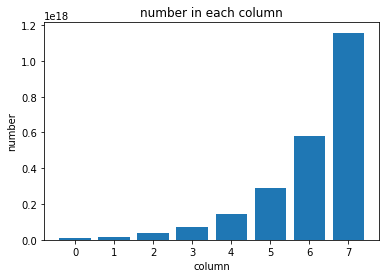

In [9]:
import matplotlib.pyplot as plt

total_number_of_wheat = np.sum(numbers_of_wheats)
mean_of_columns = np.mean(numbers_of_wheats, axis=0)

print("The total number of wheat is {}".format(total_number_of_wheat))
print("{}".format(mean_of_columns))

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(8),np.mean(numbers_of_wheats.astype(np.uint64), axis=0))
plt.show()

[Question 4] Heat map of the number of wheat

Visualize the number of wheat on an 8x8 square chessboard as a heatmap.

Heatmap provides sample code.

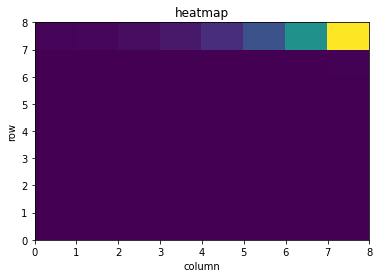

In [ ]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(np.array(numbers_of_wheats).reshape(8,8))
plt.show()

[Question 5] How many times the second half is the first half?

Find the number of wheat in the second half of the chessboard multiplied by the number of wheat in the first half. The first half is rows 0 to 3 of the array, the second half is rows 4 to 7.

In [ ]:
firstHalf, secondHalf = np.hsplit(numbers_of_wheats.astype(np.uint64), [4])
array_div = secondHalf / firstHalf
total_division_of_halfs = np.sum(secondHalf)/np.sum(firstHalf)
print("{} is multiple of first half's total number of wheat and second half's".format(total_division_of_halfs))
print(array_div)

16.0 is multiple of first half's total number of wheat and second half's
[[16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]
 [16. 16. 16. 16.]]


[Problem 6] Extension to n × m squares by other calculation methods

Create a new ``function that returns an ndarray that describes the number of wheat on an n x m square chessboard'' similar to Problem 2, np.append()one that uses and one that uses broadcasting.

Use those functions to find again the number of wheat on the 8x8 square chessboard.

In [22]:
def total_number(x, y) :
  n_squares = x * y 
  board_list = [1]

  for _ in range(n_squares - 1):
    board_list.append(2 * board_list[-1])

  board_array = np.array(board_list)
  total_number_of_wheat = np.sum(board_array)
  return total_number_of_wheat, x, y

total_number_of_wheat, column, row = total_number(8,8)

print("{} wheats in {}x{} chess board".format(total_number_of_wheat, row, column))


1.8446744073709552e+19 wheats in 8x8 chess board


[Question 7] Comparison of calculation time

I've seen 3 different methods. Please measure each calculation time using Jupyter Notebook %%timeitand compare and discuss.

%%timeitworks by executing the code in the cell multiple times and printing its average execution time.

In [27]:
%%timeit
def total_number(x, y) :
  n_squares = x * y 
  board_list = [1]

  for _ in range(n_squares - 1):
    board_list.append(2 * board_list[-1])

  board_array = np.array(board_list)
  total_number_of_wheat = np.sum(board_array)
  return total_number_of_wheat, x, y

total_number_of_wheat, column, row = total_number(8,8)

22 µs ± 964 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
